<a href="https://colab.research.google.com/github/SauKno/Final_Project_Sales_Projection/blob/main/Code/Preprocess_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#importing all the required libraries
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
import plotly.express as px
from scipy.stats import kde

pd.set_option('max_columns', 50)

np.random.seed(42)
from datetime import date, datetime, timedelta
%matplotlib inline

In [168]:
ifood_db = pd.read_csv('/content/customer_data.csv')
ifood_db.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [169]:
ifood_db.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [170]:
#Add column to account for those who have responded to the campaign]
ifood_db['R2Campaign']=ifood_db['AcceptedCmp1']+ifood_db['AcceptedCmp2']+ifood_db['AcceptedCmp3']+ifood_db['AcceptedCmp4']+ifood_db['AcceptedCmp5']+ifood_db['Response']

In [171]:
# Convert birth year to age
ifood_db['Age'] = date.today().year - ifood_db['Year_Birth']
ifood_db 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,R2Campaign,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0,55
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/14,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,1,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/14,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1,41
2238,8235,1956,Master,Together,69245.0,0,1,1/24/14,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0,66


In [172]:
ifood_db = ifood_db.drop(columns=['Year_Birth'])

In [173]:
#Find marital status listed
np.unique(ifood_db['Marital_Status'], return_counts=True)


(array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object),
 array([  2,   3, 232, 864, 480, 580,  77,   2]))

In [174]:
#Replace Marital Status with numbers (Single=Alone, Absurd, YOLO, )
ifood_db.loc[ifood_db['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
ifood_db.head(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,R2Campaign,Age
0,5524,Graduation,Single,58138.0,0,0,9/4/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,Graduation,Single,46344.0,1,1,3/8/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,Graduation,Together,71613.0,0,0,8/21/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,Graduation,Together,26646.0,1,0,2/10/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,PhD,Married,58293.0,1,0,1/19/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41


In [175]:
#Check that the code worked
np.unique(ifood_db['Marital_Status'], return_counts=True)

(array(['Divorced', 'Married', 'Single', 'Together', 'Widow'], dtype=object),
 array([232, 864, 487, 580,  77]))

In [176]:
# Change characters to numbers (Divorced=1, Married=2, Single=3, Together=4, Widow=5)
ifood_db["Marital_Status"].replace({"Divorced":"1", "Married":"2", "Single":"3", "Together":"4", "Widow":"5"}, inplace=True)

In [177]:
# Change marital status from an object to a numeric
ifood_db['Marital_Status']=pd.to_numeric(ifood_db['Marital_Status'])

In [178]:
ifood_db.dtypes

ID                       int64
Education               object
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
R2Campaign               int64
Age                      int64
dtype: object

In [179]:
#Check the values under education
np.unique(ifood_db['Education'], return_counts=True)

(array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array([ 203,   54, 1127,  370,  486]))

In [180]:
# Replace Educational to a number ("2n cycle":"0","Basic":"1","Graduation":"2","Master":"3","PhD":"4")
ifood_db["Education"].replace({"2n Cycle":"0", "Basic":"1", "Graduation":"2", "Master":"3", "PhD":"4"}, inplace=True)

In [181]:
# Convert education to a numeric data type
ifood_db['Education']=pd.to_numeric(ifood_db['Education'])


In [182]:
#Get the age of membership from Dt_Customer
ifood_db['Dt_Customer'] 


0         9/4/12
1         3/8/14
2        8/21/13
3        2/10/14
4        1/19/14
          ...   
2235     6/13/13
2236     6/10/14
2237     1/25/14
2238     1/24/14
2239    10/15/12
Name: Dt_Customer, Length: 2240, dtype: object

In [183]:
#Get the age of membership from Dt_Customer
ifood_db['Dt_Customer'] = pd.to_datetime(ifood_db['Dt_Customer'])
ifood_db.head(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,R2Campaign,Age
0,5524,2,3,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,2,3,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,2,4,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,2,4,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,4,2,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41


In [184]:
#Convert the column Dt_Customer to the years the memberhsip has been held
now = pd.Timestamp('now')
ifood_db['Dt_Customer'] = pd.to_datetime(ifood_db['Dt_Customer'], format='%y-%m-%d')    # 1
ifood_db['Dt_Customer'] = ifood_db['Dt_Customer'].where(ifood_db['Dt_Customer'] < now, ifood_db['Dt_Customer'] - np.timedelta64(100, 'Y'))   # 2
ifood_db['Dt_Customer'] = (now - ifood_db['Dt_Customer']).astype('<m8[Y]')    # 3
ifood_db.head(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,R2Campaign,Age
0,5524,2,3,58138.0,0,0,9.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,2,3,46344.0,1,1,8.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,2,4,71613.0,0,0,8.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,2,4,26646.0,1,0,8.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,4,2,58293.0,1,0,8.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41


In [185]:
#Drop irrelevant columns and create the data set for testing
ifood_db_agg = ifood_db.drop(columns=['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                                      'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                                      'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 
                                      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

In [186]:
#Check for NAN values
ifood_db_agg[ifood_db_agg.isna().any(axis=1)]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,R2Campaign,Age
10,2,2,NaN,1,0,8.0,11,0,39
27,2,3,NaN,1,0,9.0,19,0,36
43,4,3,NaN,0,0,8.0,80,0,63
48,2,3,NaN,2,1,8.0,96,0,71
58,2,3,NaN,1,0,8.0,57,0,40
71,0,2,NaN,1,0,9.0,25,0,49
90,4,2,NaN,2,1,9.0,4,0,65
91,2,3,NaN,1,1,8.0,45,0,65
92,3,4,NaN,0,0,8.0,87,0,49
128,4,2,NaN,0,1,8.0,23,0,61


In [187]:
ifood_db_agg.isnull().sum()

Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Dt_Customer        0
Recency            0
R2Campaign         0
Age                0
dtype: int64

In [188]:
#Drop rows for nan as it is only 1% of the data set
ifood_db_agg = ifood_db_agg.dropna()

In [189]:
ifood_db_agg.shape

(2216, 9)

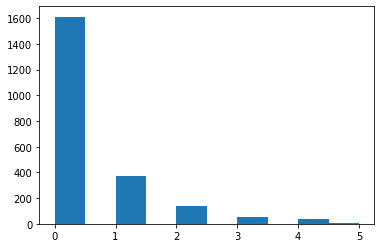

In [190]:
plt.hist(ifood_db_agg['R2Campaign'])
plt.show()

In [191]:
# Convert R2Campaign to binaries to represent those who did respond and those who did not (1,0) to run demographics on binary model
ifood_db_agg["R2Campaign"]=ifood_db_agg["R2Campaign"].replace([1, 2, 3, 4, 5], 1)


In [192]:
np.unique(ifood_db_agg['R2Campaign'], return_counts=True)

(array([0, 1]), array([1611,  605]))

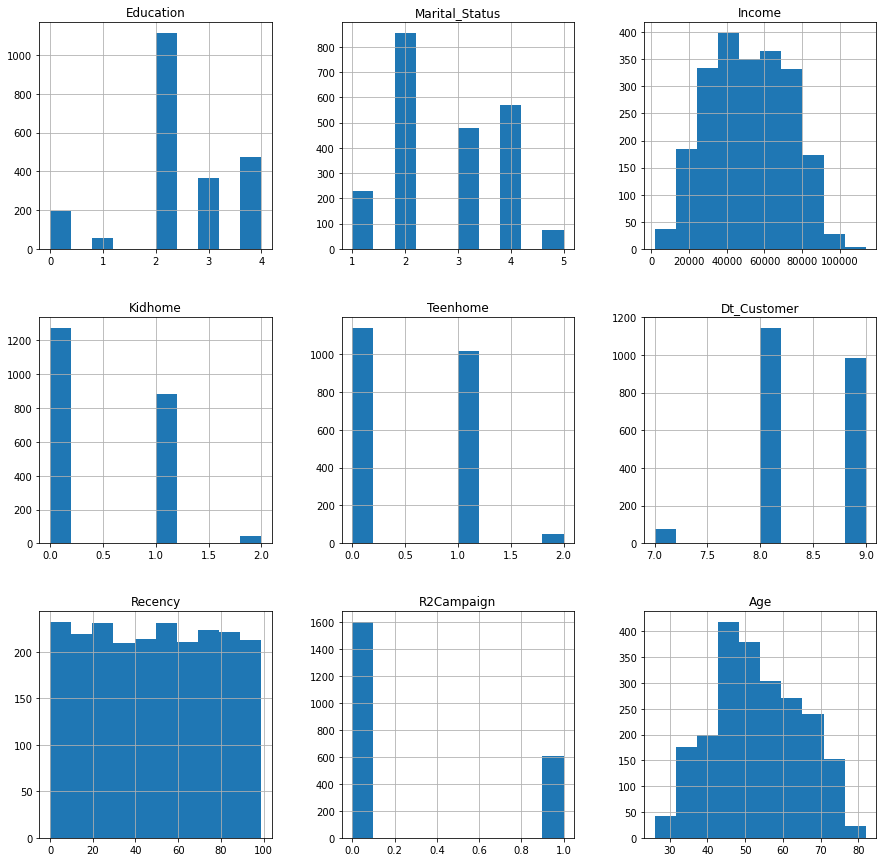

In [239]:
# Graph histogram to look for any patterns in the data by column
ifood_db_agg.hist()
plt.rcParams['figure.figsize'] = (12, 12)


In [194]:
ifood_db_agg.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,R2Campaign,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.393953,2.731047,52247.251354,0.441787,0.505415,8.412455,49.012635,0.273014,53.179603
std,1.124141,1.062750,25173.076661,0.536896,0.544181,0.556114,28.948352,0.445609,11.985554
min,0.000000,1.000000,1730.000000,0.000000,0.000000,7.000000,0.000000,0.000000,26.000000
25%,2.000000,2.000000,35303.000000,0.000000,0.000000,8.000000,24.000000,0.000000,45.000000
50%,2.000000,3.000000,51381.500000,0.000000,0.000000,8.000000,49.000000,0.000000,52.000000
75%,3.000000,4.000000,68522.000000,1.000000,1.000000,9.000000,74.000000,1.000000,63.000000
max,4.000000,5.000000,666666.000000,2.000000,2.000000,9.000000,99.000000,1.000000,129.000000


In [94]:
#Age and income are skewed. Looking for outliers to drop from dataframe

In [195]:
px.box(ifood_db_agg, y = "Income")

In [196]:
#Remove all rows of data that is above the upper fence (outliers)
dropdata = ifood_db_agg[ifood_db_agg['Income'] >113800].index

In [197]:
ifood_db_agg = ifood_db_agg.drop(dropdata)

In [198]:
px.box(ifood_db_agg, y = "Income")

In [199]:
px.box(ifood_db_agg, y = "Age")

In [200]:
dropdata2 = ifood_db_agg[ifood_db_agg['Age'] >82].index

In [201]:
ifood_db_agg = ifood_db_agg.drop(dropdata2)

In [202]:
px.box(ifood_db_agg, y = "Income")

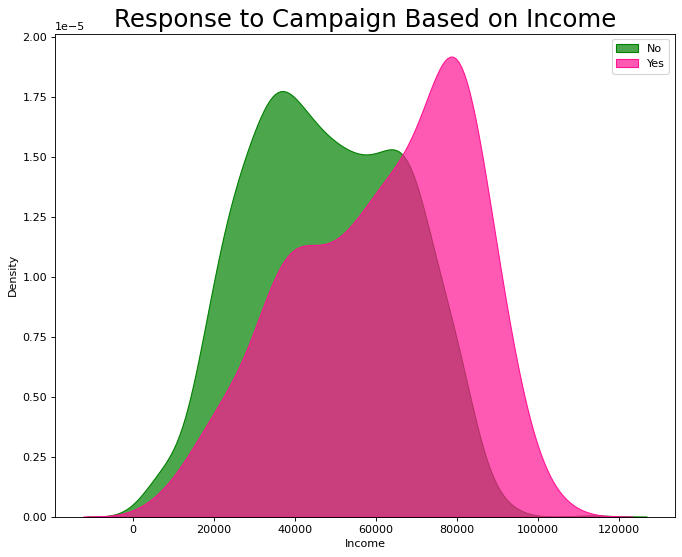

In [203]:


plt.figure(figsize=(10,8), dpi= 80)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 0, "Income"], shade=True, color="g", label="No", alpha=.7)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 1, "Income"], shade=True, color="deeppink", label="Yes", alpha=.7)
# Decoration
plt.title('Response to Campaign Based on Income', fontsize=22)
plt.legend()
plt.show()

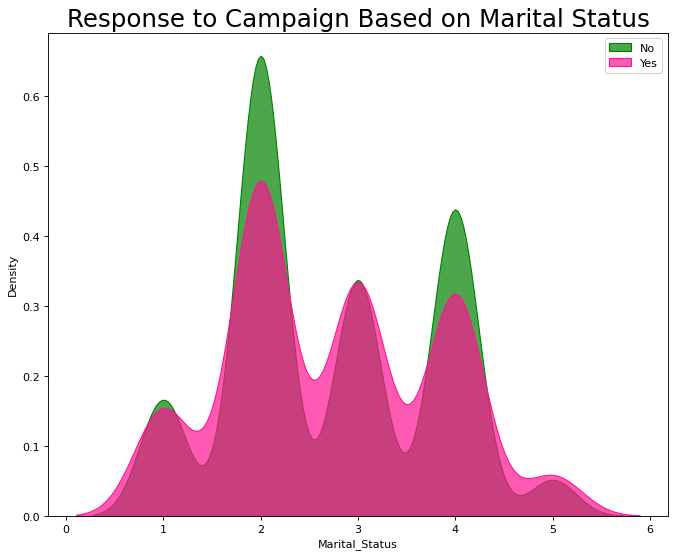

In [204]:
plt.figure(figsize=(10,8), dpi= 80)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 0, "Marital_Status"], shade=True, color="g", label="No", alpha=.7)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 1, "Marital_Status"], shade=True, color="deeppink", label="Yes", alpha=.7)
# Decoration
plt.title('Response to Campaign Based on Marital Status', fontsize=22)
plt.legend()
plt.show()

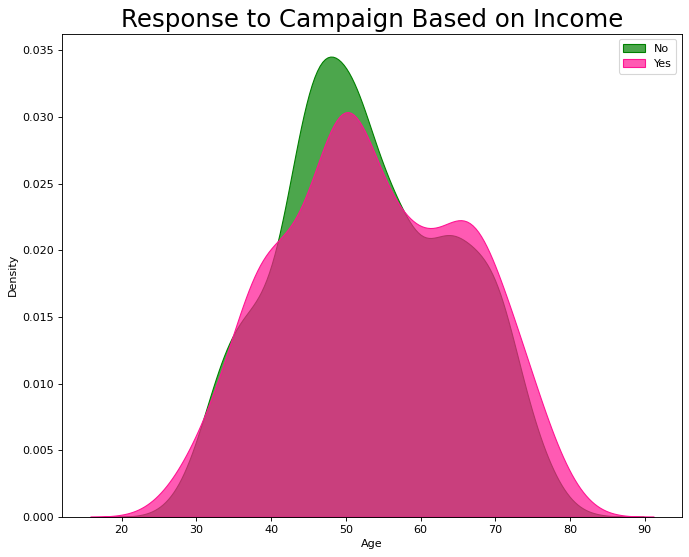

In [205]:


plt.figure(figsize=(10,8), dpi= 80)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 0, "Age"], shade=True, color="g", label="No", alpha=.7)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 1, "Age"], shade=True, color="deeppink", label="Yes", alpha=.7)
# Decoration
plt.title('Response to Campaign Based on Income', fontsize=22)
plt.legend()
plt.show()

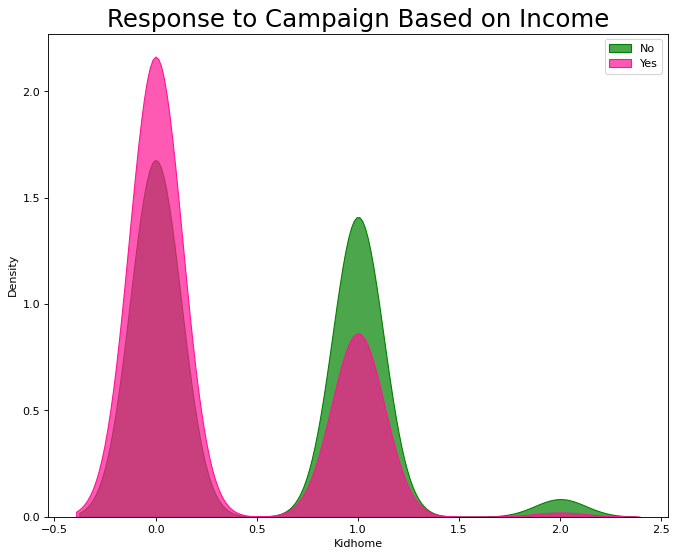

In [206]:


plt.figure(figsize=(10,8), dpi= 80)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 0, "Kidhome"], shade=True, color="g", label="No", alpha=.7)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 1, "Kidhome"], shade=True, color="deeppink", label="Yes", alpha=.7)
# Decoration
plt.title('Response to Campaign Based on Income', fontsize=22)
plt.legend()
plt.show()

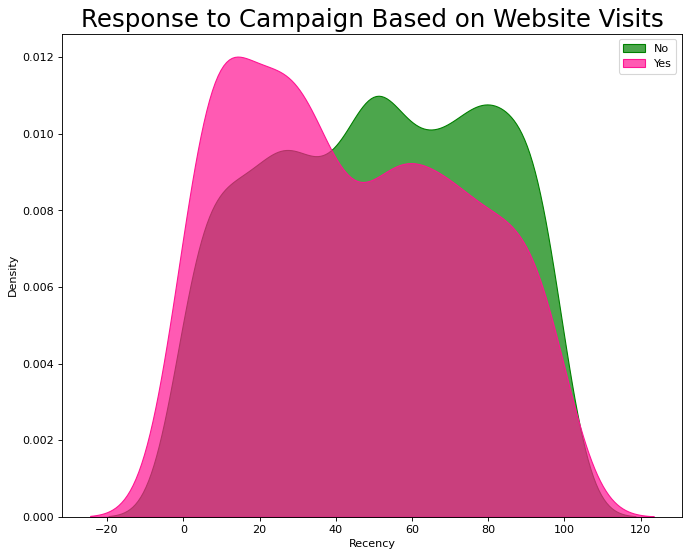

In [207]:
plt.figure(figsize=(10,8), dpi= 80)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 0, "Recency"], shade=True, color="g", label="No", alpha=.7)
sns.kdeplot(ifood_db_agg.loc[ifood_db_agg['R2Campaign'] == 1, "Recency"], shade=True, color="deeppink", label="Yes", alpha=.7)
# Decoration
plt.title('Response to Campaign Based on Website Visits', fontsize=22)
plt.legend()
plt.show()

In [208]:
ifood_db_agg.to_csv(r'clean_data.csv', header = True)

In [240]:
ifood_db_agg.dtypes

Education           int64
Marital_Status      int64
Income            float64
Kidhome             int64
Teenhome            int64
Dt_Customer       float64
Recency             int64
R2Campaign          int64
Age                 int64
dtype: object